In [2]:
# Collect variables
not_my_data = set(dir())

For the purposes of rendering on GitHub, the charts will be rendered as simple svg and therefore non-interactive
To see what the interactive version looks like you can follow the link in the README file

# Setting a goal
Let's say we wanna make a mobile game. And obviously we want it to score high in revenue. We will use the following dataset as a tool for market exploration and look for some insights as to what genre we should choose for our game.

In [3]:
# Import necessary libraries
import pandas as pd
import plotly.express as px

In [4]:
# Set the render engine to inline mode for jupyter notebook
%matplotlib inline
# "Revenue" feature in this dataset is stored as int64, but for a better readability I'll separate thousands.
pd.options.display.float_format = "{:,.0f}".format

In [5]:
# Load the data and display first 10 rows
df = pd.read_csv("C://Users/HP/Downloads/Highest Grossing Mobile Gamescsv.csv")
df.head(10)

,Game,Revenue,Initial release,Publisher(s),Genre(s)
0,Honor of Kings / Arena of Valor,14667500000,2015-11-26,Tencent Games,MOBA
1,Monster Strike,10000000000,2013-08-08,Mixi,Puzzle / RPG / Strategy
2,PUBG Mobile,9000000000,2018-03-19,Tencent Games / Krafton / VNG Games,Battle royale
3,Puzzle & Dragons,8578340000,2012-02-20,GungHo Online Entertainment,RPG / Puzzle
4,Clash of Clans,8000000000,2012-08-02,Supercell (Tencent),Strategy
5,Pokémon Go,7760000000,2016-07-06,Niantic / The Pokémon Company,Augmented reality
6,Candy Crush Saga,7456000000,2012-11-14,King (Activision Blizzard),Puzzle
7,Fate/Grand Order,6300000000,2015-07-30,Aniplex (Sony Music Entertainment Japan),RPG
8,Fantasy Westward Journey,4700000000,2015-03-26,NetEase,MMORPG
9,Garena Free Fire,4330000000,2017-12-04,Garena,Battle royale


# Data Exploration

In [6]:
# First let's take a look at what type of values we have, are there any null values and how many entries we have.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Game             104 non-null    object
 1   Revenue          104 non-null    int64 
 2   Initial release  104 non-null    object
 3   Publisher(s)     104 non-null    object
 4   Genre(s)         104 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [7]:
# Looks like we don't have any null values, but the "Initial release" feature is stored as text, so we'll have to fix it later on.
# Are there any duplicate values?
df.duplicated().any()

False

In [8]:
# We've got only one numeric feature in our dataset, let's see what are it's mean, standard deviation, min, max and quartiles.
df.describe()

,Revenue
count,104
mean,"1,617,105,433"
std,"2,454,734,804"
min,"100,000,000"
25%,"240,750,000"
50%,"742,600,000"
75%,"1,525,000,000"
max,"14,667,500,000"


In [9]:
# How many unique Publishers are in our data?
df["Publisher(s)"].nunique()

71

In [10]:
# Genres?
df["Genre(s)"].nunique()

48

In [11]:
# Games?
df["Game"].nunique()

104

In [12]:
# Alright, let's address the issue with the "Initial release" feature and create an additional feature with just the year of release
# It'll help us later when we look at revenue per year distribution
df['Initial release'] = df['Initial release'].astype('datetime64')
df['year'] = pd.DatetimeIndex(df['Initial release']).year

# Summary

This dataset ends with year 2021 and contains only the highest grossing games of that time period, so this isn't enough to make a bold statement that in year 2022 (even less so in the year 2023) you should make a game in either "MOBA" or "Puzzle/RPG/Strategy" genres to make the most out of the industry, for example. For that we would need a fresher dataset supplemented with information about less grossing games, their budget, player preferences, downloads, hard copy sales, rankings etc. But(!) this is enough to make some sense out of the past years tendencies in the gaming industry, as well as to give us some hints for the following research on the market to make those bold statements.

# Recommendations AKA "call to action"
I'll put this at the top, where it belongs and then dive deeper on how one can get such insights from this data.

##### Based on this dataset, genres that we should consider making a deeper dive on are:
* MOBA
* Puzzle/RPG/Strategy
* Action RPG
* Simulator/Social

##### Take lessons from the following publishers:

In [13]:
# Picking top 5 publishers that released games in the above genres by revenue
df[
    df['Genre(s)'].isin([
        'MOBA',
        'Puzzle / RPG / Strategy',
        'Action RPG',
        'Simulator / Social'
    ])
][
    ['Publisher(s)',
     'Revenue']
].reset_index(drop=True).head(5)

,Publisher(s),Revenue
0,Tencent Games,14667500000
1,Mixi,10000000000
2,miHoYo,3567000000
3,Supercell (Tencent),1400000000
4,Moonton (ByteDance),1000000000


# Research

In [14]:
# Let's see what are the highest grossing genre, publisher and game on average and what are their shares across the dataset
# We can do it in a readable, but slightly less memory efficient way with additional variables:

# Group the dataset by genres and calculate median revenue, sorting the result in desc order
med_rev_per_genre = df.groupby("Genre(s)")["Revenue"].median().sort_values(ascending=False)

# Grabbing the first (the highest value) row and storing it's index (genre name) in another variable
genre = med_rev_per_genre.head(1).index[0]

# Dividing the highest value by the sum of all median values to get the share
genre_share = round(max(med_rev_per_genre) / sum(med_rev_per_genre) * 100, 2)

# Same process for publisher and game
med_rev_per_publisher = df.groupby("Publisher(s)")["Revenue"].median().sort_values(ascending=False)
publisher = med_rev_per_publisher.head(1).index[0]
pub_share = round(max(med_rev_per_publisher) / sum(med_rev_per_publisher) * 100, 2)

game_rev = df.groupby("Game")["Revenue"].median().sort_values(ascending=False)
game = game_rev.head(1).index[0]
game_share = round(max(game_rev) / sum(game_rev) * 100, 2)

print(f'Higest grossing genre on average is: "{genre}"')
print(f'And it\'s share of revenue is: {genre_share}%')
print(f'\nHighest grossing publisher is: "{publisher}"')
print(f'And it\'s share of revenue is: {pub_share}%')
print(f'\nHighest grossing game is: "{game}"')
print(f'And it\'s share of revenue is: {game_share}%')

Higest grossing genre on average is: "Puzzle / RPG / Strategy"
And it's share of revenue is: 16.49%

Highest grossing publisher is: "Tencent Games"
And it's share of revenue is: 13.07%

Highest grossing game is: "Honor of Kings / Arena of Valor"
And it's share of revenue is: 8.72%


In [15]:
# Or we can get the same result quicker and w/o generating unnecessary variables
print(f'Higest grossing genre on average is: "{df.groupby("Genre(s)")["Revenue"].median().sort_values(ascending=False).head(1).index[0]}"')
print(f'And it\'s share of revenue is: {round(max(df.groupby("Genre(s)")["Revenue"].median()) / sum(df.groupby("Genre(s)")["Revenue"].median()) * 100, 2)}%')
print(f'\nHighest grossing publisher is: "{df.groupby("Publisher(s)")["Revenue"].median().sort_values(ascending=False).head(1).index[0]}"')
print(f'And it\'s share of revenue is: {round(max(df.groupby("Publisher(s)")["Revenue"].median()) / sum(df.groupby("Publisher(s)")["Revenue"].median()) * 100, 2)}%')
print(f'\nHighest grossing game is: "{df.groupby("Game")["Revenue"].sum().sort_values(ascending=False).head(1).index[0]}"')
print(f'And it\'s share of revenue is: {round(max(df.groupby("Game")["Revenue"].median()) / sum(df.groupby("Game")["Revenue"].median()) * 100, 2)}%')

Higest grossing genre on average is: "Puzzle / RPG / Strategy"
And it's share of revenue is: 16.49%

Highest grossing publisher is: "Tencent Games"
And it's share of revenue is: 13.07%

Highest grossing game is: "Honor of Kings / Arena of Valor"
And it's share of revenue is: 8.72%


### *Top 10 Games by Revenue*
*(+ Publisher name on hover)*

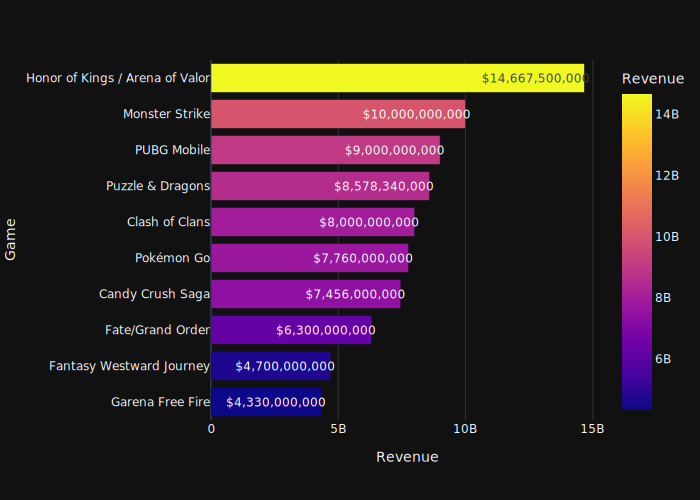

In [16]:
# Let's plot top 10 games by revenue
fig = px.bar(
    df.sort_values('Revenue', ascending=False).head(10),
    x="Revenue",
    y='Game',
    text='Revenue',
    # Let's change the Revenue formatting using d3-format rules
    text_auto='$,.0f',
    color='Revenue',
    hover_data={
        'Game':False,
        'Publisher(s)':True,
        'Revenue':':$,.0f'}
# We also need the chart in descending order for better readability, so let's update the chart layout
).update_layout(
    yaxis={'categoryorder':'total ascending'}
)
fig.show(renderer="svg")

### *Top 10 Genres by Revenue*

In [17]:
# First we need to find what are the top 10 genres. The same approach applies to all the following charts.
df.groupby('Genre(s)').sum().sort_values('Revenue', ascending=False).head(10)

,Revenue,year
Genre(s),,
MOBA,17853500000,10085
Battle royale,16015270000,8070
Strategy,15357400000,18138
Puzzle,14875600000,18140
MMORPG,13882755000,18160
RPG,13453200000,24208
RPG / Puzzle,12078340000,4027
Puzzle / RPG / Strategy,10000000000,2013
Augmented reality,8687720000,4035


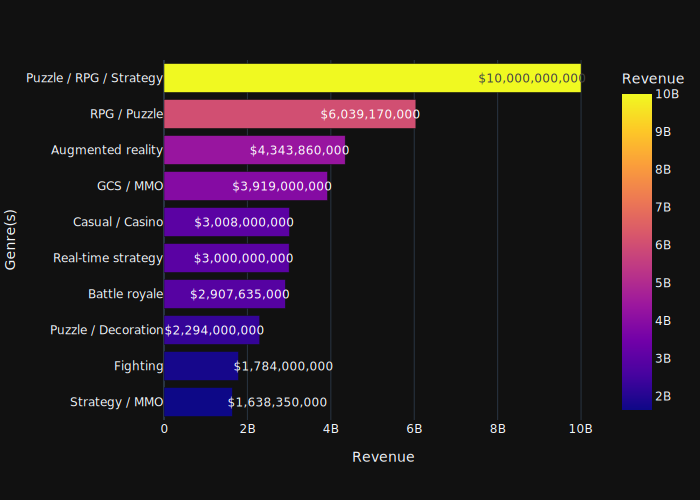

In [18]:
# Now we plot them
fig = px.bar(
    df.groupby('Genre(s)').median().sort_values('Revenue', ascending=False).head(10).reset_index(),
    x="Revenue",
    y='Genre(s)',
    text='Revenue',
    # Changing Revenue format again using d3-format rules
    text_auto='$,.0f',
    color='Revenue',
    hover_data={
        'Genre(s)':False,
        'Revenue':':$,.0f'}
    # And the order should be desc
).update_layout(
    yaxis={'categoryorder':'total ascending'}
)
fig.show(renderer='svg')

Despite MOBA genre having the highest sum of revenue, Puzzle/RPG/Strategy has the highest revenue on average

### *Top 10 Publishers by median Revenue*

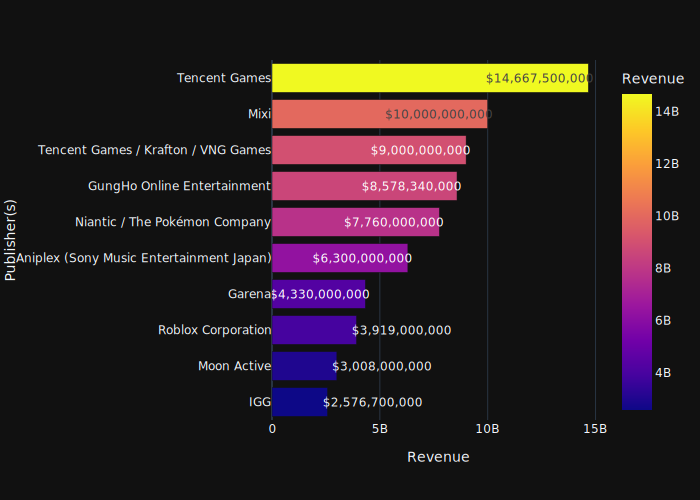

In [19]:
fig = px.bar(
    df.groupby("Publisher(s)")["Revenue"].median().sort_values(ascending=False).head(10).reset_index(),
    x="Revenue",
    y='Publisher(s)',
    text='Revenue',
    # Revenue formatting
    text_auto='$,.0f',
    color='Revenue',
    hover_data={
        'Publisher(s)':False,
        'Revenue':':$,.0f'}
    # Descending order
).update_layout(
    yaxis={'categoryorder':'total ascending'}
)
fig.show(renderer='svg')

#### Let's see how the date of initial release affected overall revenue and what game it was

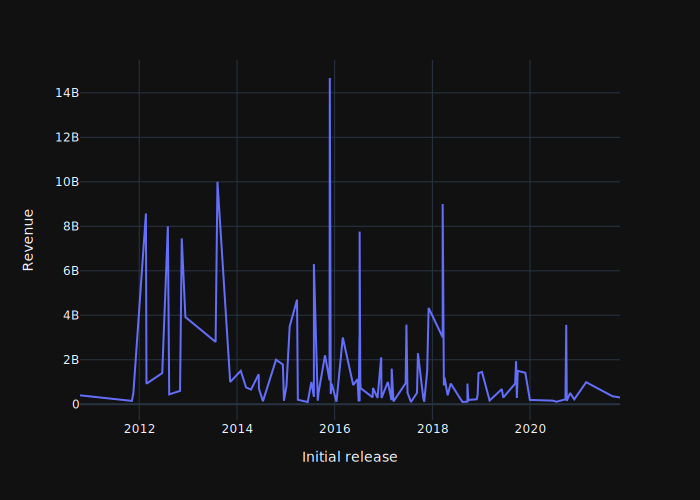

In [20]:
fig = px.line(
    df.groupby(['Initial release','Game']).sum().reset_index(),
    x='Initial release',
    y='Revenue',
    hover_data={
        'Game':True
    }
)
fig.show(renderer='svg')
# Doesn't really show us much as it is just individual games and their revenue, so for that we created additional feature "Year"

#### Also let's see how Revenue was spread by years, and what genres were making it up

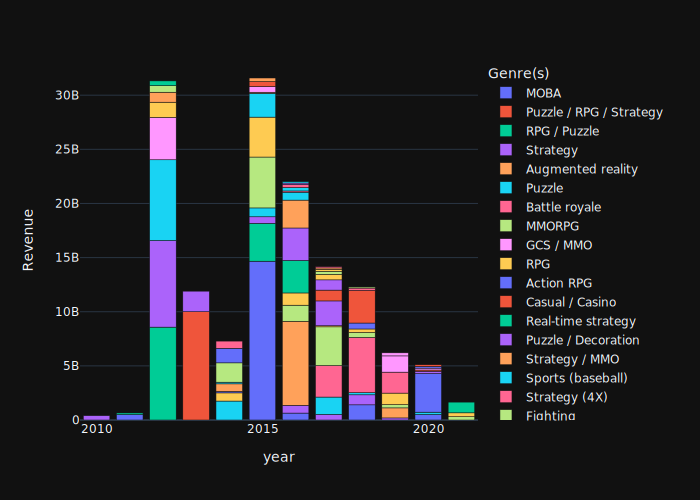

In [21]:
# Stacked bars are nice for this task
fig = px.bar(
    df.groupby(['year', 'Genre(s)']).median().sort_values('Revenue', ascending=False).reset_index(),
    x='year',
    y='Revenue',
    color='Genre(s)'
)
fig.show(renderer='svg')

### Number of Games grossing over $100,000,000 published by year

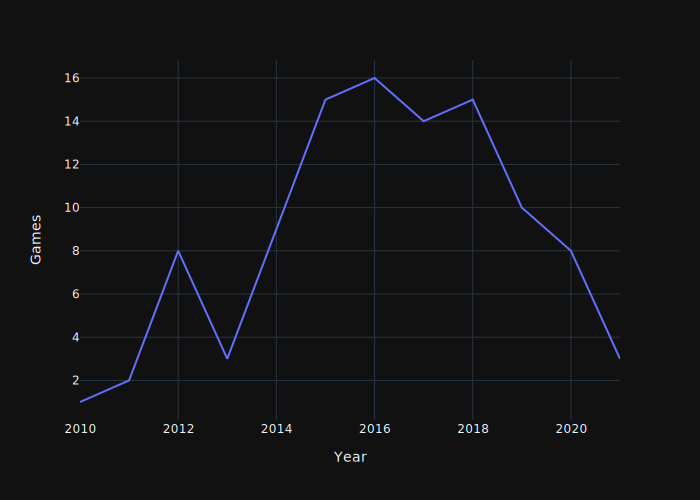

In [22]:
# Unfortunately there isn't enough data to explain the decline in number of very high grossing games over the years
# For that we would need a much larger dataset with more features to analyse.
fig = px.line(
    df['year'].value_counts().reset_index().sort_values('index').rename(columns={
        'index':'Year',
        'year':'Games'
    }),
    x='Year',
    y='Games'
)
fig.show(renderer='svg')

Now that's a decline in number of decent games...

#### Quite a few games are a mix of genres rather than one single genre, let's see how often individual genre elements occur in our dataset

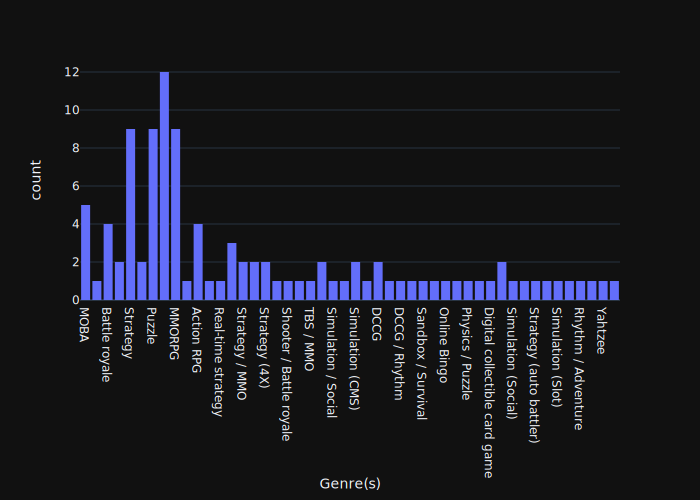

In [23]:
fig = px.histogram(df, x='Genre(s)')
fig.show(renderer='svg')

In [24]:
# To get individual elements we can split genres by the "/" delimiter
g = []
for i in range(len(df['Genre(s)'].unique())):
    for elem in df['Genre(s)'].unique()[i].split(' / '):
        g.append(elem)

In [25]:
sg = pd.DataFrame(columns=["Genre"], data=g)

In [26]:
sg

,Genre
0,MOBA
1,Puzzle
2,RPG
3,Strategy
4,Battle royale
...,...
61,Rhythm
62,Adventure
63,Racing
64,Yahtzee


In [27]:
# We need to get rid of the brackets to boil everything down to genre elements. Regex will help.
sg.loc[sg['Genre'].str.contains("\s\(.*\)", case=False)]

,Genre
22,Sports (baseball)
23,Strategy (4X)
35,Simulation (CMS)
47,Sports (pool)
50,Sports (association football)
52,Racing (Kart)
53,Simulation (Social)
56,Strategy (auto battler)
59,Simulation (Slot)
60,Sports (basketball)


In [28]:
sg['Genre'].replace('\s\(.*\)', '', regex=True, inplace=True)

In [29]:
# Two of the values didn't split beautifully, we'll fix that
sg.iloc[33].replace('\s\(.*', '', regex=True, inplace=True)
sg.iloc[34].replace("\)", '', regex=True, inplace=True)

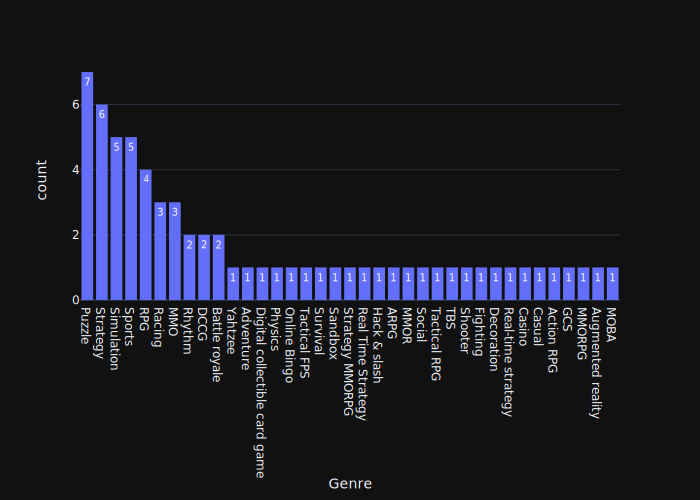

In [30]:
fig = px.histogram(sg, x='Genre', text_auto=True).update_xaxes(categoryorder='total descending')
fig.show(renderer='svg')

#### Most commonly seen throughout the dataset values are "Puzzle" and "Strategy". Now the revenue of these genres and games doesn't surprise us that much, does it?

Here we need to remember that the dataset contains only the __Highest grossing__ games, so the conclusion this information gives us is: players like to be challenged with puzzles, they also really like strategical gameplay and the immersion they get from simulators. If you mix these together and add some RPG features — you have a modern AAA game with immense amounts of downloads and client loyalty, hence revenue :)
But adding all of those makes the game look more like a PC "AAA" game, so I'd recommend choosing several of the features described before, but keep the balance between a good "easy-to-play" mobile game and overloaded with features game.

In [40]:
# Delete declared variables from memory
my_data = set(dir()) - not_my_data
to_delete = my_data
for _var in to_delete:
    if _var in locals() or _var in globals():
        exec(f'del {_var}')